# NN tryouts on SPR data, inspired by Kaggle Forum "When less is more"

Load training and validation data as 
    month : [ Features | Targets| Difference | Last Choice Targets  ]
    
    - Features : 
    - Target labels : TARGET_LABELS(month), 'targets_str', 'targets_dec'
    - Difference with prev month : diff' = targets_dec(month) - targets_dec(month-1)
    - Last Choice Targets : LC_TARGET_LABELS(month-1), 'lc_targets_str', 'lc_targets_dec'


In [1]:
import os
import numpy as np
import pandas as pd

import logging
logging.getLogger().handlers = []
logging.basicConfig(level=logging.INFO)

import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [166]:
from dataset import load_trainval, LC_TARGET_LABELS
from common import to_yearmonth, TARGET_LABELS

In [3]:
features = [
    u'ind_empleado', u'pais_residencia',
    u'sexo', u'age', u'ind_nuevo', u'antiguedad', u'indrel',
    u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
    u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'nomprov',
    u'ind_actividad_cliente', u'renta', u'segmento'    
]

In [4]:
train_yearmonths_list = [201503, 201504, 201505, 201506, 201603, 201604]
val_yearmonth = [201605]
train_nb_clients = 50000
train_df, val_df = load_trainval(train_yearmonths_list, val_yearmonth, train_nb_clients)

INFO:root:- Load training data : [201502, 201503, 201504, 201505, 201506, 201602, 201603, 201604]
INFO:root:-- Select 50000 clients
INFO:root:- Number of lines with unknown data : 15
INFO:root:- Number of columns with nan : 9
INFO:root:-- Process date : 201503
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] =

Display loaded data

In [5]:
print train_df.shape, train_df.columns

(399976, 75) Index([u'fecha_dato', u'ncodpers', u'ind_empleado', u'pais_residencia',
       u'sexo', u'age', u'fecha_alta', u'ind_nuevo', u'antiguedad', u'indrel',
       u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
       u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'nomprov',
       u'ind_actividad_cliente', u'renta', u'segmento', u'ind_ahor_fin_ult1',
       u'ind_aval_fin_ult1', u'ind_cco_fin_ult1', u'ind_cder_fin_ult1',
       u'ind_cno_fin_ult1', u'ind_ctju_fin_ult1', u'ind_ctma_fin_ult1',
       u'ind_ctop_fin_ult1', u'ind_ctpp_fin_ult1', u'ind_deco_fin_ult1',
       u'ind_deme_fin_ult1', u'ind_dela_fin_ult1', u'ind_ecue_fin_ult1',
       u'ind_fond_fin_ult1', u'ind_hip_fin_ult1', u'ind_plan_fin_ult1',
       u'ind_pres_fin_ult1', u'ind_reca_fin_ult1', u'ind_tjcr_fin_ult1',
       u'ind_valo_fin_ult1', u'ind_viv_fin_ult1', u'ind_nomina_ult1',
       u'ind_nom_pens_ult1', u'ind_recibo_ult1', u'targets_str',
       u'targets_dec', u'diff', u'lc_ind_ahor

In [6]:
print val_df.shape, val_df.columns

(1853326, 75) Index([u'fecha_dato', u'ncodpers', u'ind_empleado', u'pais_residencia',
       u'sexo', u'age', u'fecha_alta', u'ind_nuevo', u'antiguedad', u'indrel',
       u'ult_fec_cli_1t', u'indrel_1mes', u'tiprel_1mes', u'indresi',
       u'indext', u'conyuemp', u'canal_entrada', u'indfall', u'nomprov',
       u'ind_actividad_cliente', u'renta', u'segmento', u'ind_ahor_fin_ult1',
       u'ind_aval_fin_ult1', u'ind_cco_fin_ult1', u'ind_cder_fin_ult1',
       u'ind_cno_fin_ult1', u'ind_ctju_fin_ult1', u'ind_ctma_fin_ult1',
       u'ind_ctop_fin_ult1', u'ind_ctpp_fin_ult1', u'ind_deco_fin_ult1',
       u'ind_deme_fin_ult1', u'ind_dela_fin_ult1', u'ind_ecue_fin_ult1',
       u'ind_fond_fin_ult1', u'ind_hip_fin_ult1', u'ind_plan_fin_ult1',
       u'ind_pres_fin_ult1', u'ind_reca_fin_ult1', u'ind_tjcr_fin_ult1',
       u'ind_valo_fin_ult1', u'ind_viv_fin_ult1', u'ind_nomina_ult1',
       u'ind_nom_pens_ult1', u'ind_recibo_ult1', u'targets_str',
       u'targets_dec', u'diff', u'lc_ind_aho

In [4]:
#train_df.head(10)

In [5]:
#mask = (~train_df['diff'].isnull()) & (train_df['diff'] != 0.0)
#train_df[mask].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_str', 'targets_dec', 'diff', 'lc_targets_str', 'lc_targets_dec']].head(10)

In [6]:
#val_df.head(10)

In [7]:
#mask = (~val_df['diff'].isnull()) & (val_df['diff'] != 0.0)
#val_df[mask].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_str', 'targets_dec', 'diff', 'lc_targets_str', 'lc_targets_dec']].head(10)

## Check active client performances 2015 -> 2016

1) We observed that client actions repeats from 2015 to 2016. For example, there are ~37% of clients that add the same products in 2015-MM and in 2016-MM and ~50% of clients that add or remove that same quantity of products in 2015-MM and 2016-MM.

In [7]:
months_ym_map = {}
months = list(set(train_df['fecha_dato'].unique()) | set(val_df['fecha_dato'].unique()))
for m in months:
    months_ym_map[to_yearmonth(m)] = m

In [8]:
yms = [201503, 201504, 201505]

train_months = train_df['fecha_dato'].unique()
val_months = val_df['fecha_dato'].unique()
for ym in yms:
    ym1 = ym + 100
    
    df1 = train_df if months_ym_map[ym] in train_months else val_df
    df2 = train_df if months_ym_map[ym1] in train_months else val_df
    
    mask1 = (~df1['diff'].isnull()) & (df1['diff'] != 0.0)
    tmask1 = df1['fecha_dato'] == months_ym_map[ym]
    active_clients1 = df1[tmask1 & mask1]['ncodpers'].unique()

    mask2 = (~df2['diff'].isnull()) & (df2['diff'] != 0.0)
    tmask2 = df2['fecha_dato'] == months_ym_map[ym1]
    active_clients2 = df2[tmask2 & mask2]['ncodpers'].unique()

    active_clients = list(set(active_clients1) & set(active_clients2))   
    
    mask1 &= df1['ncodpers'].isin(active_clients)
    t1 = df1[tmask1 & mask1].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_dec', 'diff', 'lc_targets_dec']]

    mask2 &= df2['ncodpers'].isin(active_clients)
    t2 = df2[tmask2 & mask2].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_dec', 'diff', 'lc_targets_dec']]

    print "-------"
    print ym, ym1
    total = t1['diff'].shape[0]
    eq = (t1['diff'].values == t2['diff'].values).sum()
    aeq = (np.abs(t1['diff'].values) == np.abs(t2['diff'].values)).sum()
    print "Percentage : eq =", eq*1.0/total, " | aeq =", aeq*1.0/total
    
       

-------
201503 201603
Percentage : eq = 0.369082125604  | aeq = 0.534299516908
-------
201504 201604
Percentage : eq = 0.414046121593  | aeq = 0.557651991614
-------
201505 201605
Percentage : eq = 0.375117813384  | aeq = 0.564561734213


In [9]:
mask1 = (~train_df['diff'].isnull()) & (train_df['diff'] != 0.0)
tmask1 = train_df['fecha_dato'] == '2015-05-28'
train_active_clients = train_df[tmask1 & mask1]['ncodpers'].unique()

mask2 = (~val_df['diff'].isnull()) & (val_df['diff'] != 0.0)
tmask2 = val_df['fecha_dato'] == '2016-05-28'
val_active_clients = val_df[tmask2 & mask2]['ncodpers'].unique()

active_clients = list(set(train_active_clients) & set(val_active_clients))

In [10]:
mask1 &= train_df['ncodpers'].isin(active_clients)
t1 = train_df[tmask1 & mask1].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_dec', 'diff', 'lc_targets_dec']]
t1.head(10)

,fecha_dato,ncodpers,targets_dec,diff,lc_targets_dec
2308256,2015-05-28,15929,2132017,1,2132016.0
2307937,2015-05-28,16731,2101256,-1,2101257.0
2308157,2015-05-28,17059,2097152,-1,2097153.0
2308492,2015-05-28,18201,2162721,1,2162720.0
2307051,2015-05-28,18921,526592,-6,526598.0
2306760,2015-05-28,19706,591987,-4,591991.0
2307819,2015-05-28,20406,2162960,-1,2162961.0
2307428,2015-05-28,21866,2166784,-1,2166785.0
2307460,2015-05-28,21945,557383,-32,557415.0
2309831,2015-05-28,28357,2162688,-1,2162689.0


In [11]:
mask2 &= val_df['ncodpers'].isin(active_clients)
t2 = val_df[tmask2 & mask2].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato', 'ncodpers', 'targets_dec', 'diff', 'lc_targets_dec']]
t2.head(10)

,fecha_dato,ncodpers,targets_dec,diff,lc_targets_dec
1238783,2016-05-28,15929,2132017,1,2132016.0
1239207,2016-05-28,16731,2103297,1,2103296.0
1239260,2016-05-28,17059,2097153,1,2097152.0
1237762,2016-05-28,18201,2162689,1,2162688.0
1238057,2016-05-28,18921,526614,524294,2320.0
1240639,2016-05-28,19706,526455,4,526451.0
1240974,2016-05-28,20406,2162960,-1,2162961.0
1239538,2016-05-28,21866,2166784,-1,2166785.0
1239499,2016-05-28,21945,557377,-2,557379.0
1237522,2016-05-28,28357,2162689,1,2162688.0


In [12]:
total = t1['diff'].shape[0]
eq = (t1['diff'].values == t2['diff'].values).sum()
aeq = (np.abs(t1['diff'].values) == np.abs(t2['diff'].values)).sum()
print "Percentage : eq =", eq*1.0/total, " | aeq =", aeq*1.0/total


Percentage : eq = 0.375117813384  | aeq = 0.564561734213


Client who declare the 'renta' modifications -> nobody

In [13]:
train_months = train_df['fecha_dato'].unique()
val_months = val_df['fecha_dato'].unique()
for ym in yms:
    ym1 = ym + 100
    
    df1 = train_df if months_ym_map[ym] in train_months else val_df
    df2 = train_df if months_ym_map[ym1] in train_months else val_df
    
    tmask1 = df1['fecha_dato'] == months_ym_map[ym]
    active_clients1 = df1[tmask1]['ncodpers'].unique()

    tmask2 = df2['fecha_dato'] == months_ym_map[ym1]
    active_clients2 = df2[tmask2]['ncodpers'].unique()

    active_clients = list(set(active_clients1) & set(active_clients2))   
    
    tmask1 &= df1['ncodpers'].isin(active_clients)
    r1 = df1[tmask1].sort_values(['ncodpers'])[['ncodpers', 'renta']]

    tmask2 &= df2['ncodpers'].isin(active_clients)
    r2 = df2[tmask2].sort_values(['ncodpers'])[['ncodpers', 'renta']]
    
    assert (r1['ncodpers'].values == r2['ncodpers'].values).all(), "WTF"
    rdiff = r1['renta'] != r2['renta']
    print rdiff.sum()

0
0
0


2) Some clients buy/sell the same quantity of products in the time series: e.g. diff = [2, -2, 2, -2...]

In [14]:
mask = train_df['diff'].isin([2,-2])
train_df[mask].sort_values(['ncodpers', 'fecha_dato'])[['fecha_dato','ncodpers', 'renta', 'diff', 'targets_dec']].head(20)

,fecha_dato,ncodpers,renta,diff,targets_dec
1047830,2015-03-28,17857,173409.00,-2,530737
1466050,2015-04-28,17857,173409.00,2,530739
2941019,2015-06-28,17857,173409.00,2,530707
1047795,2015-03-28,17934,348061.29,-2,557153
1466015,2015-04-28,17934,348061.29,2,557155
2309010,2015-05-28,17934,348061.29,-2,557153
2941070,2015-06-28,17934,348061.29,2,557155
1048278,2015-03-28,18138,136694.64,-2,526369
1466499,2015-04-28,18138,136694.64,2,526371
2308508,2015-05-28,18138,136694.64,-2,526369


In [21]:
train_df[train_df['ncodpers']==18138][['fecha_dato','ncodpers', 'renta', 'diff', 'targets_dec', 'age'] + TARGET_LABELS].head(20)

,fecha_dato,ncodpers,renta,diff,targets_dec,age,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
210523,2015-02-28,18138,136694.64,-16777216,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1
1048278,2015-03-28,18138,136694.64,-2,526369,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,1
1466499,2015-04-28,18138,136694.64,2,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1
2308508,2015-05-28,18138,136694.64,-2,526369,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,1
2940567,2015-06-28,18138,136694.64,2,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1
3635100,2016-02-28,18138,136694.64,-16777216,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1
4379275,2016-03-28,18138,136694.64,0,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1
5420643,2016-04-28,18138,136694.64,0,526371,75.0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,1.0,1


In [30]:
# yms = [201503, 201504, 201505, 201506]
# for i, ym in enumerate(yms[:-1]):
#     ym1 = yms[i+1]
    
#     df1 = train_df if months_ym_map[ym] in train_months else val_df
#     tmask1 = df1['fecha_dato'] == months_ym_map[ym]
#     tmask2 = df1['fecha_dato'] == months_ym_map[ym1]

#     print df1[tmask1][['ncodpers', 'diff']].head(3)
#     print df1[tmask2][['ncodpers', 'diff']].head(3)    
#     res = df1[tmask1]['diff'].values * df1[tmask2]['diff'].values < 0
#     print df1[tmask1]['diff'].shape, df1[tmask2]['diff'].shape, np.sum(res)
# #     print df1[res][['ncodpers', 'diff']].head(3)    

#     if i == 1: 
#         break
    
    

In [31]:
from common import get_added_products, remove_last_choice, apk, map7_score2
from visualization import visualize_train_test, visualize_folds, compare_two_datasets, compare_folds, compare_folds2

Create profiles and create models for profiles

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Merge
from keras.utils import np_utils

Using Theano backend.


### Feature engineering

In [33]:
def get_age_group_index(age):
    if age < 10:
        return -3
    elif age < 15:
        return -2        
    elif age < 18:
        return -1    
    elif age < 23:
        return 0
    elif age < 25:
        return 1
    elif age < 27:
        return 2
    elif age < 28:
        return 3    
    elif age < 32:
        return 4
    elif age < 37:
        return 5    
    elif age < 42:
        return 6
    elif age < 47:
        return 7
    elif age < 52:
        return 8
    elif age < 57:
        return 9
    elif age < 60:
        return 10
    elif age < 65:
        return 11
    elif age < 70:
        return 12
    elif age < 75:
        return 13
    elif age < 80:
        return 14
    else:
        return 15

def get_income_group_index(income):
    if income < 0:
        return -1
    elif income < 45542.97:
        return 1
    elif income < 57629.67:
        return 2
    elif income < 68211.78:
        return 3
    elif income < 78852.39:
        return 4
    elif income < 90461.97:
        return 5
    elif income < 103855.23:
        return 6
    elif income < 120063.00:
        return 7
    elif income < 141347.49:
        return 8
    elif income < 173418.36:
        return 9
    elif income < 234687.12:
        return 10
    else:
        return 11

In [258]:
A = 1.0
B = 1.0
def transform_target(x):
    return np.sign(x) * np.log(np.abs(x) * 1.0 / A + B )

def inv_transform_target(y):
    return np.sign(y)*(np.exp(np.abs(y)) - B) * A


#
# log(x / a + b) = y  ->  x/a = exp(y) - b
#
x = 1 
print transform_target(x), inv_transform_target(transform_target(x))

x_neg = np.arange(-50000, -1, 1)
x_pos = np.arange(1, 50000, 1)

diff = np.abs(inv_transform_target(transform_target(x_neg)) - x_neg)
print np.sum(diff), diff
diff = np.abs(inv_transform_target(transform_target(x_pos)) - x_pos)
print np.sum(diff), diff

0.69314718056 1.0
5.53012015292e-07 [  1.45519152e-11   7.27595761e-12   0.00000000e+00 ...,   8.88178420e-16
   0.00000000e+00   4.44089210e-16]
5.52997463377e-07 [  0.00000000e+00   4.44089210e-16   0.00000000e+00 ...,   7.27595761e-12
   0.00000000e+00   7.27595761e-12]


In [259]:
active_clients_mask = ~train_df['diff'].isin([0, -16777216])

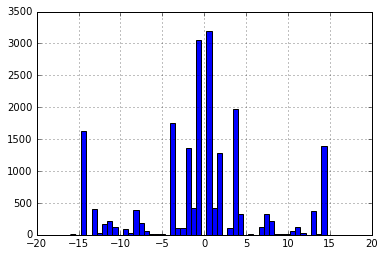

In [260]:
train_df[active_clients_mask]['diff'].apply(transform_target).hist(bins=50)

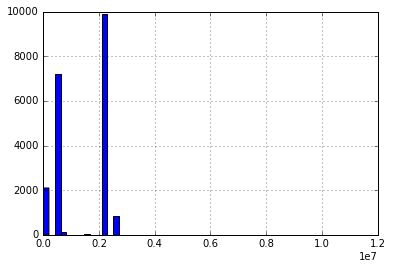

In [264]:
#train_df[active_clients_mask]['targets_dec'].apply(transform_target).hist(bins=50)

In [265]:
train_fe_df = train_df.copy()
train_fe_df.loc[:,'age'] = train_df['age'].apply(get_age_group_index)
train_fe_df.loc[:,'renta'] = train_df['renta'].apply(get_income_group_index)
train_fe_df.loc[:,'diff'] = train_df[active_clients_mask]['diff'].apply(transform_diff)
#train_fe_df.loc[:,'targets_dec'] = train_df[active_clients_mask]['targets_dec'].apply(transform_diff)

In [266]:
train_fe_df[active_clients_mask][['age', 'renta', 'diff', 'targets_dec']].head()

,age,renta,diff,targets_dec
1048512,13,11,0.693147,2132017
1466735,13,11,-0.693147,2132016
2308256,13,11,0.693147,2132017
4380328,13,11,0.693147,2132017
5430454,13,11,-0.693147,2132016


### Train a model

We can train over client features to predict products difference `diff`. 

``` python
for MM in ['04', '05']:
    X = [ Features | 'diff', abs('diff') ](2015-MM) #+ [ Diff Features ](2015-MM,2016-MM) 
    Y = [ 'diff', abs('diff') ](2016-MM)
    CrossVal()
```

In [267]:
def get_common_clients(df, mask1, mask2):
    active_clients1 = df[mask1]['ncodpers'].unique()
    active_clients2 = df[mask2]['ncodpers'].unique()
    active_clients = list(set(active_clients1) & set(active_clients2)) 
    return train_df['ncodpers'].isin(active_clients)

In [268]:
active_clients_mask = ~train_df['diff'].isin([0, -16777216])

In [269]:
print active_clients_mask.shape, active_clients_mask.sum()

(399976,) 20197


In [270]:
current_month = 201503
next_year_month = current_month + 100
month_mask = train_df['fecha_dato'] == months_ym_map[current_month]
next_year_month_mask = train_df['fecha_dato'] == months_ym_map[next_year_month]

In [271]:
print (month_mask & active_clients_mask).shape, (month_mask & active_clients_mask).sum()
print (next_year_month_mask & active_clients_mask).shape, (next_year_month_mask & active_clients_mask).sum()

(399976,) 3530
(399976,) 3186


In [272]:
active_clients_mask2 = get_common_clients(train_df, month_mask & active_clients_mask, next_year_month_mask & active_clients_mask)
print active_clients_mask2.shape, active_clients_mask2.sum()
print (month_mask & active_clients_mask2).shape, (month_mask & active_clients_mask2).sum()
print (next_year_month_mask & active_clients_mask2).shape, (next_year_month_mask & active_clients_mask2).sum()

(399976,) 8280
(399976,) 1035
(399976,) 1035


In [273]:
X = train_fe_df[month_mask & active_clients_mask2][['ncodpers', 'fecha_dato', 'diff', 'targets_dec'] + features]
Y = train_fe_df[next_year_month_mask & active_clients_mask2][['ncodpers', 'fecha_dato', 'diff', 'targets_dec']]

In [274]:
print X.shape
X.head(10)

(1035, 23)


,ncodpers,fecha_dato,diff,targets_dec,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,...,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,segmento
1048512,15929,2015-03-28,0.693147,2132017,3,0,1,13,0,242,...,0,0,0,1,1,0,1,1.0,11,0
1048345,16152,2015-03-28,1.945910,524391,0,0,0,10,0,241,...,0,0,0,0,1,0,1,1.0,11,0
1048178,18082,2015-03-28,0.693147,2099201,0,0,1,13,0,216,...,0,0,0,0,1,0,1,1.0,11,0
1048127,18603,2015-03-28,-0.693147,526400,0,0,0,8,0,237,...,0,0,0,0,1,0,17,1.0,-1,0
1049707,18921,2015-03-28,13.169810,526598,0,0,1,9,0,237,...,0,0,0,0,1,0,1,1.0,11,1
1049805,18970,2015-03-28,14.556091,2195553,0,0,1,7,0,229,...,0,0,0,0,1,0,1,1.0,11,0
1050020,19706,2015-03-28,10.397238,624755,0,0,0,12,0,237,...,0,0,0,0,1,0,2,1.0,10,1
1049939,20377,2015-03-28,1.945910,2097255,0,0,0,11,0,160,...,0,0,0,0,11,0,3,1.0,11,0
1048919,20953,2015-03-28,0.693147,524353,0,0,0,9,0,215,...,0,0,0,0,1,0,1,1.0,11,0
1045424,23643,2015-03-28,-2.833213,524391,0,0,0,9,0,229,...,0,0,0,0,1,0,1,1.0,10,0


In [275]:
print Y.shape
Y.head(10)

(1035, 4)


,ncodpers,fecha_dato,diff,targets_dec
4380328,15929,2016-03-28,0.693147,2132017
4380341,16152,2016-03-28,1.945910,524391
4379147,18082,2016-03-28,-0.693147,2099200
4379953,18603,2016-03-28,-0.693147,2099264
4379648,18921,2016-03-28,-13.169798,2326
4379567,18970,2016-03-28,-14.556091,98401
4382197,19706,2016-03-28,-1.098612,526449
4382506,20377,2016-03-28,-3.496508,524353
4382435,20953,2016-03-28,0.693147,524353
4376569,23643,2016-03-28,0.693147,97


### Run KFold Cross-validation 

In [ ]:
def create_model(input_dim):
        
    model = Sequential()
    model.add(Dense(input_dim, init='uniform', input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(50, activation='relu', init='normal'))
    model.add(Dropout(0.10))
    model.add(Dense(30, activation='relu', init='normal'))
    model.add(Dropout(0.10))
    model.add(Dense(1, init='normal'))
    # for a mean squared error regression problem
    model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
    return model

In [ ]:
# CROSS VALIDATION
from sklearn.preprocessing import StandardScaler
n_highest = 7

def prepare_to_fit(X_train, Y_train):
    # Select only active client for the training part
    mask = X_train['diff'] > 0
    x_train = X_train[mask].drop(['diff'], axis=1).values
    y_train = Y_train[mask][TARGET_LABELS].values
    x_train = StandardScaler().fit_transform(x_train)
    return x_train, y_train

def prepare_to_fit_nomask(X_train, Y_train):
    y_train = Y_train[TARGET_LABELS].values
    x_train = X_train.drop(['diff'], axis=1).values
    x_train = StandardScaler().fit_transform(x_train)
    return x_train, y_train

def prepare_to_test(X_val, Y_val=None):
    if Y_val is not None:
        y_val = Y_val[TARGET_LABELS].values
    
    x_val = []
    x_val = X_val.drop(['diff'], axis=1).values    
    x_val = StandardScaler().fit_transform(x_val)  
    
    if Y_val is not None:
        return x_val, y_val
    else:
        return x_val

def cross_val_score2(data, 
                     nb_folds=5, 
                     prepare_to_fit_func=prepare_to_fit, 
                     prepare_to_test_func=prepare_to_test, 
                     create_model_func=create_model):
    
    x_df, y_df, clients_last_choice_df = data
    kf = KFold(n_splits=nb_folds)
    scores = []
    
    for train_index, test_index in kf.split(range(x_df.shape[0])):
        X_train, X_val = x_df.loc[x_df.index[train_index], :], x_df.loc[x_df.index[test_index], :]
        Y_train, Y_val = y_df.loc[y_df.index[train_index], :], y_df.loc[y_df.index[test_index], :]
        CLC_val = clients_last_choice_df.loc[clients_last_choice_df.index[test_index], :]
                
        x_train, y_train = prepare_to_fit_func(X_train, Y_train)
        x_val, y_val = prepare_to_test_func(X_val, Y_val)
        
        logging.info("- Train/Val shapes : {}, {} | {}, {}".format(
                [i.shape for i in x_train] if isinstance(x_train, list) else x_train.shape, 
                [i.shape for i in x_val] if isinstance(x_val, list) else x_val.shape, 
                y_train.shape, 
                y_val.shape)
        )                
            
        logging.info("- Create the model : ")
        estimator = create_model_func(x_train.shape[1], len(TARGET_LABELS))
        logging.info("- Fit the model")
        hist = estimator.fit(x_train, y_train, nb_epoch=250, batch_size=5000, verbose=0)        
        for key in hist.history:            
            logging.info("-- %s : min=%f, max=%f" % (key, np.min(hist.history[key]), np.max(hist.history[key])))
        
        logging.info("- Predict using trained model")
        y_pred = estimator.predict(x_val, verbose=0)
        logging.info("- Compute map7 score")
        scores.append(map7_score2(y_val, y_pred, CLC_val[TARGET_LABELS].values))        
    
    return np.array(scores)

In [ ]:
results = cross_val_score2((X.drop(['ncodpers'], axis=1), Y, clients_last_choice), 
                           nb_folds=nb_folds)
print "Cross-Validation \n %i | %f | %f | %f | %.5f " % (nb_folds, results.min(), results.mean(), results.max(), results.std())

### Test 1 : Train on active clients + feature engineering

#### Data: 

- yearmonth_list = [201505, 201506]
- nb_clients = 250000

#### Feature engineering

- age -> age group
- income -> income group


#### Model

- 75 -> 50 -> 30 ->
- sigmoid, binary_crossentropy, nadam, accuracy, 

**Conf:**
- batch_size=2000

*Cross-validation results :* 

 Nb epoch | Nb folds | Min MAP@7 | Mean MAP@7 | Max MAP@7 | STD MAP@7
 --- | --- | --- | --- | --- | ---
 150 | 3 | 0.025659 | 0.029959 | 0.037639 | 0.00544 


#### Model 1 

- 50 -> 30 ->
- sigmoid, binary_crossentropy, nadam, accuracy, 

**Conf:**
- batch_size=2000

*Cross-validation results :* 

 Nb epoch | Nb folds | Min MAP@7 | Mean MAP@7 | Max MAP@7 | STD MAP@7
 --- | --- | --- | --- | --- | ---
 150 | 3 | 0.025802 | 0.030137 | 0.037217 | 0.00505 


Kaggle : 0.0197579

## Train model for predictions

In [ ]:
def train_model(X_train, Y_train):

    x_train, y_train = prepare_to_fit(X_train, Y_train)
    logging.info("- Train data shapes : {}, {}".format(
            [i.shape for i in x_train] if isinstance(x_train, list) else x_train.shape, 
            y_train.shape)
    )                

    logging.info("- Create the model")
    
    estimator = create_model(x_train.shape[1], len(TARGET_LABELS))
    logging.info("- Fit the model")
    hist = estimator.fit(x_train, y_train, nb_epoch=150, batch_size=2000, verbose=0)        
    for key in hist.history:            
        logging.info("-- %s : min=%f, max=%f" % (key, np.min(hist.history[key]), np.max(hist.history[key])))
    return estimator

estimator = train_model(X[['diff'] + features], Y)

Check score on the data 2016

In [ ]:
yearmonth_list = [201604, 201605] 
nb_months = len(yearmonth_list)
nb_clients = 'max'

In [ ]:
val_df = load_data2(TRAIN_FILE_PATH, yearmonth_list, nb_clients)
minimal_clean_data_inplace(val_df)
preprocess_data_inplace(val_df)

months = val_df['fecha_dato'].unique()
clients = val_df['ncodpers'].unique()
assert len(clients) == (val_df['ncodpers'].value_counts() == nb_months).sum()
ll = len(clients)
for m in months:
    l = len(val_df[val_df['fecha_dato'] == m]['ncodpers'].unique())
    assert l == ll, "Number of clients should be identical for all monthes. (%s, %s, %s)" % (m, l, ll)

In [ ]:
val_df = val_df.sort_values(['fecha_dato', 'ncodpers'])
last_choice_mask = val_df['fecha_dato'] == months[-2]
train_month_mask = trainval_df['fecha_dato'] == months[-1]

In [ ]:
def add_diff_inplace(df, last_choice_mask, train_month_mask):
    tmp_df = df[['fecha_dato','ncodpers']]
    tmp_df.loc[:,'target'] = df[TARGET_LABELS].sum(axis=1)
    v1 = tmp_df[train_month_mask]['target'].values
    v2 = tmp_df[last_choice_mask]['target'].values
    ll = min(len(v1), len(v2))
    indices = tmp_df.index[ll:]
    df.loc[indices,'diff'] = pd.Series(v1 - v2, index=indices)
    del tmp_df, v1, v2

In [ ]:
add_diff_inplace(trainval_df, last_choice_mask, train_month_mask)
print trainval_df.shape

In [ ]:
clients_last_choice = trainval_df[last_choice_mask][['ncodpers'] + TARGET_LABELS].sort_values(['ncodpers'])
X = trainval_df[train_month_mask][['ncodpers', 'diff'] + features]
Y = trainval_df[train_month_mask][['ncodpers'] + TARGET_LABELS]

In [ ]:
# Select only clients from test data
clients_last_choice = clients_last_choice[clients_last_choice['ncodpers'].isin(X['ncodpers'])]
assert (X['ncodpers'].values == clients_last_choice['ncodpers'].values).all(), "WTF"

## Prediction on test data

Load the last month from the training dataset to get user last choice and remove it from predictions

In [ ]:
yearmonth_list = [201605]
lastmonth_df = load_data2(TRAIN_FILE_PATH, yearmonth_list)
minimal_clean_data_inplace(lastmonth_df)

test_df = load_data2(TEST_FILE_PATH, [])
minimal_clean_data_inplace(test_df)
preprocess_data_inplace(test_df)
test_df = test_df.sort_values(['ncodpers'])

clients_last_choice_test = lastmonth_df[['ncodpers'] + TARGET_LABELS].sort_values(['ncodpers'])
# Select only clients from test data
clients_last_choice_test = clients_last_choice_test[clients_last_choice_test['ncodpers'].isin(test_df['ncodpers'])]
assert (test_df['ncodpers'].values == clients_last_choice_test['ncodpers'].values).all(), "WTF"

In [ ]:
X_test = test_df[['ncodpers'] + features]

In [ ]:
X_test.loc[:,'age'] = X_test['age'].apply(get_age_group_index)
X_test.loc[:,'renta'] = X_test['renta'].apply(get_income_group_index)

Make predictions

In [ ]:
def get_submission(y_pred, clients, clc, target_labels, n_highest=7):
    predicted_added_products = np.argsort(y_pred, axis=1)
    predicted_added_products = predicted_added_products[:,::-1][:,:n_highest]
    added_products_col = []
    count = 0 
    for products, last_choice in zip(predicted_added_products, clc):
        predictions = remove_last_choice(products, last_choice)
        added_products_col.append(' '.join([target_labels[i] for i in predictions]))
        count+=1
        if count % 100000 == 0:
            logging.info("Elapsed : %i", count)
            
    out = pd.DataFrame(data={'ncodpers': clients, 'added_products': added_products_col}, columns=['ncodpers', 'added_products'])
    return out

In [ ]:

data = {
    0: {'x': X_test, 'clc': clients_last_choice_test},
}

submissions = []
for i in data.keys():
    x = data[i]['x']
    clc = data[i]['clc']
    x_test = prepare_to_test(x)
    y_pred = estimator.predict(x_test, verbose=0)

    clients = x['ncodpers']
    submission = get_submission(y_pred, clients, clc[TARGET_LABELS].values, TARGET_LABELS, 7)
    print submission.head()
    submissions.append(submission)

submission = pd.concat(submissions)

In [ ]:
submission.head()

Get submission DataFrame and write csv file

In [ ]:
from datetime import datetime
import csv

logging.info('- Generate submission')
submission_file = '../results/submission_' + \
                  str(datetime.now().strftime("%Y-%m-%d-%H-%M")) + \
                  '.csv'

submission.to_csv(submission_file, index=False, index_label=False)